In [7]:
import os
import torch
import torch.nn as nn
from PIL import Image
import numpy as np



In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
            nn.Conv2d(16, 16, 3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),  
            nn.MaxPool2d(2),
            
            nn.Conv2d(16, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),  
            nn.MaxPool2d(2),
            
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            
            nn.Flatten(), 
            nn.Dropout(0.5), 
            nn.Linear(64 * 6 * 6, 256), nn.BatchNorm1d(256), nn.ReLU(), 
            nn.Dropout(0.5),
            nn.Linear(256, 7), 
        )
    
    def forward(self, x):
        return self.net(x)

In [36]:
checkpoint = torch.load("../best_models/model_checkpoint_60.62.pth")
model = CNN()
model.load_state_dict(checkpoint)
model.eval()
from sklearn.metrics import confusion_matrix

classes = list(os.listdir('../data/train'))
correct = 0
total = 0

y_true = []
y_pred = []

for i, em in enumerate(classes):
    em_dir = os.path.join("../data/test", em)
    for img_name in os.listdir(em_dir):
        img_path = os.path.join(em_dir, img_name)
        image = Image.open(img_path)
        img_array = np.array(image, dtype=np.float32)
        img_tensor = torch.from_numpy(img_array) / 255
        img_tensor = img_tensor.unsqueeze(0)
        if len(img_tensor.shape) == 3:
            img_tensor = img_tensor.unsqueeze(0) 
        with torch.no_grad():
            outputs = model(img_tensor)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            conf, pred = torch.max(probs, 1)

        y_true.append(i)
        y_pred.append(pred.item())

        total += 1
        if i==pred.item():
            correct += 1

print(total, correct, 'accuracy: ' , 100 * correct / total)

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_15152\1161169676.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("../best_models/model_checkpoint_60

7178 4351 accuracy:  60.61577040958484


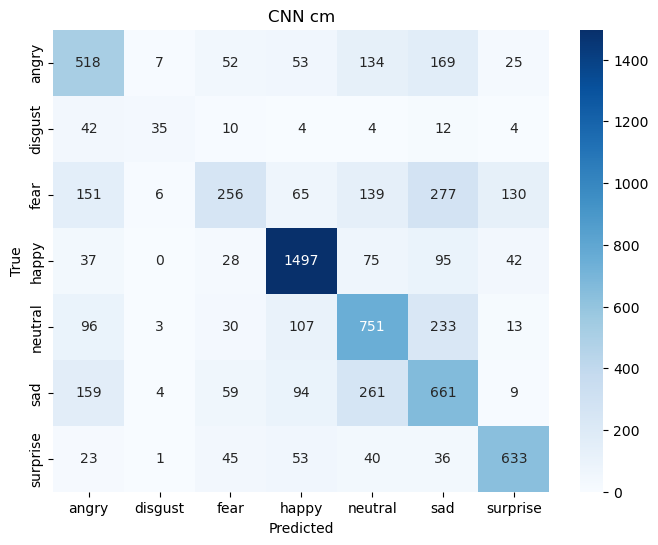

In [28]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('CNN cm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
print(f"My acccuracy is 60.61577!!!")

My acccuracy is 60.61577!!!
